In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('cards.png', cv2.IMREAD_GRAYSCALE)
#edge1 = cv2.Canny(img, 50, 200)
#edge2 = cv2.Canny(img, 100, 200)
edge3 = cv2.Canny(img, 170, 200)

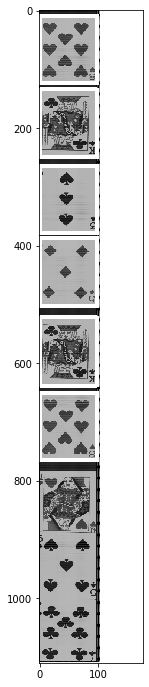

In [4]:
contours, hierarchy = cv2.findContours(edge3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
rects2 = [(x,y,w,h) for (x,y,w,h) in rects if ((w>=95)&(w<=100)&(h>=113)&(h<=117))]
imgimg=img.copy()
for rect in rects2:
    # Draw the rectangles
    cv2.rectangle(imgimg, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (255, 255, 255), 5) 

plt.figure(figsize=(15,12))
plt.imshow(imgimg,cmap="gray")

In [4]:
rects2

[(0, 650, 98, 115),
 (1, 650, 97, 115),
 (1, 522, 97, 116),
 (1, 387, 97, 116),
 (1, 387, 97, 116),
 (1, 264, 97, 115),
 (1, 264, 97, 115),
 (1, 134, 97, 116),
 (0, 9, 98, 115),
 (1, 10, 97, 114)]

In [7]:
imgimg[:98, 650:765]

array([], shape=(98, 0), dtype=uint8)

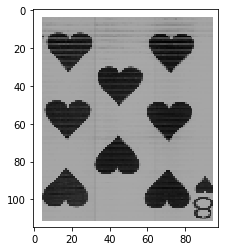

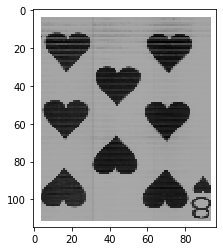

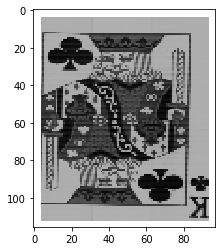

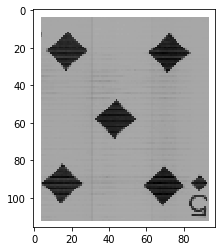

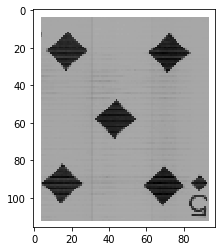

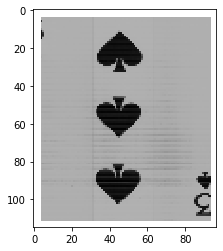

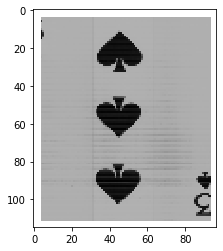

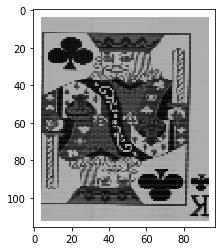

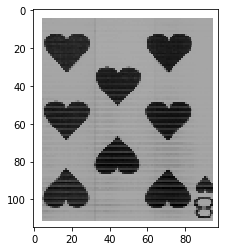

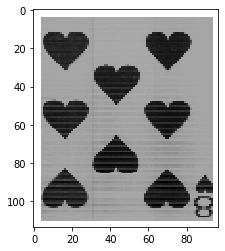

In [21]:
for rect in rects2:
    plt.figure()
    plt.imshow(imgimg[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]],cmap="gray")

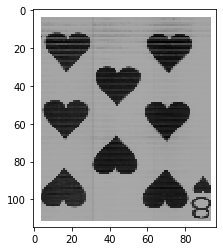

In [19]:
rect=rects2[1]
plt.imshow(imgimg[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]],cmap="gray")

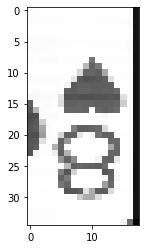

In [5]:
rect = rects2[0]
card = img[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
plt.imshow(card[80:115, 80:98],cmap="gray")

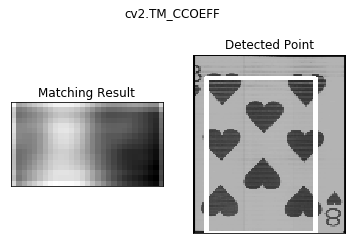

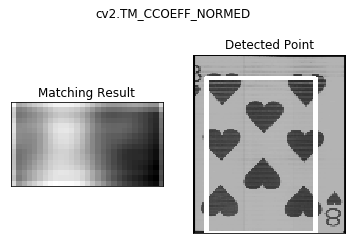

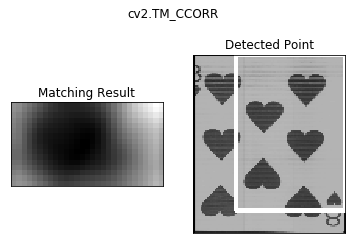

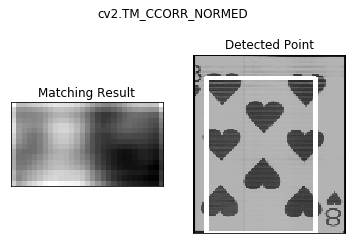

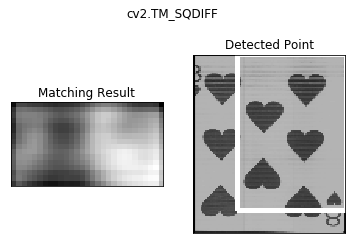

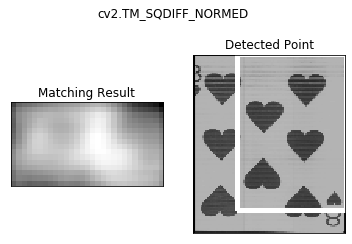

In [29]:
img2 = card.copy()
template = cv2.imread('./Card_Imgs/Hearts.jpg',0)
w, h = template.shape[::-1]


# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)


    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc



    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)


    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

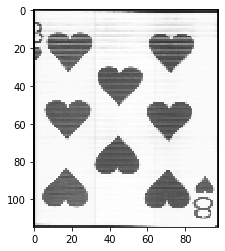

In [33]:
w, h = template.shape[::-1]
img = img2.copy()
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5
loc = np.where(res >= threshold)


for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

plt.imshow(img,cmap="gray")

In [6]:
img2 = card.copy()
template = cv2.imread('./Card_Imgs/Eight.jpg',0)
w, h = template.shape[::-1]


# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)


    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc



    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)


    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1109: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'


In [11]:
card

array([[  0,  52,  48, ...,  38,  37,   5],
       [  0, 167, 176, ...,  31,  30,   4],
       [  0, 167, 176, ..., 178, 174,  20],
       ...,
       [  0, 167, 176, ..., 180, 180,  22],
       [  0, 141, 152, ..., 180, 180,  21],
       [  0,  33,  33, ..., 173,  82,   8]], dtype=uint8)

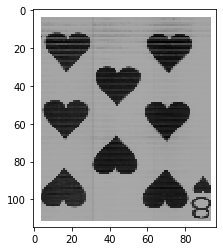

In [12]:
rect=rects2[1]
plt.imshow(imgimg[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]],cmap="gray")

In [13]:
edge_card = cv2.Canny(card, 170, 200)

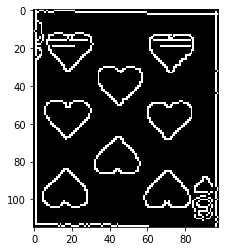

In [14]:
plt.imshow(edge_card,cmap="gray")

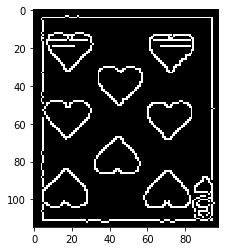

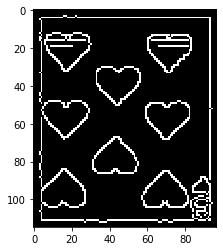

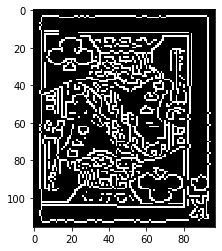

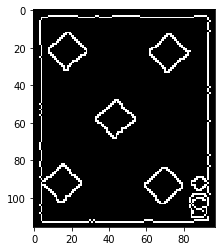

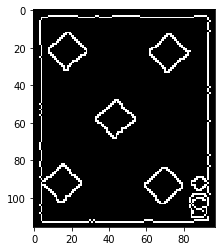

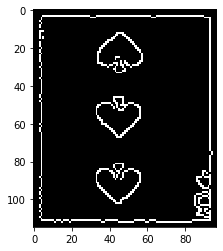

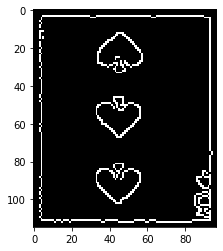

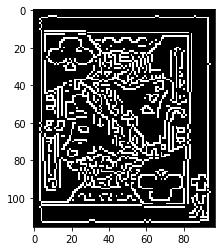

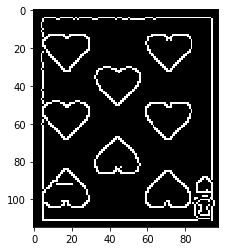

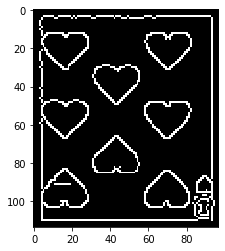

In [15]:
for rect in rects2:
    plt.figure()
    card = imgimg[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    edge_card = cv2.Canny(card, 170, 200)
    plt.imshow(edge_card,cmap="gray")

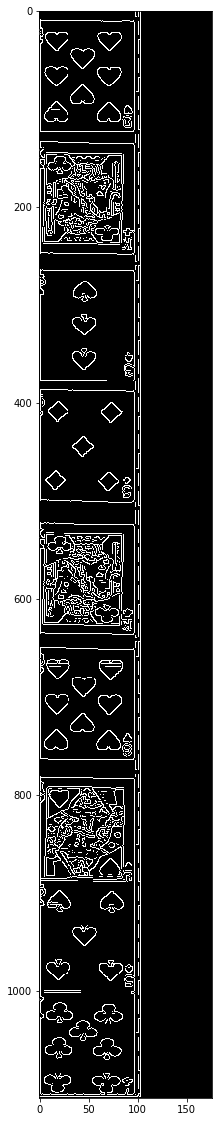

In [21]:
plt.figure(figsize=(30,20))
plt.imshow(edge3, cmap="gray")

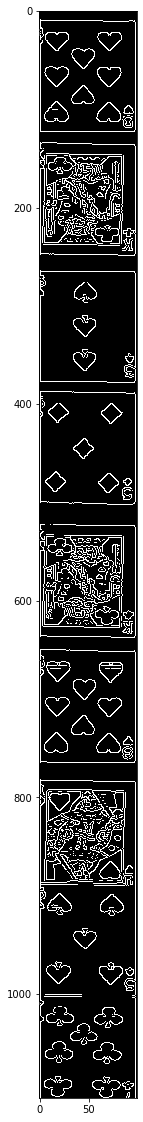

In [23]:
img = cv2.imread('cards_new.jpg', cv2.IMREAD_GRAYSCALE)
edge4 = cv2.Canny(img, 180, 200)
plt.figure(figsize=(30,20))
plt.imshow(edge4, cmap="gray")

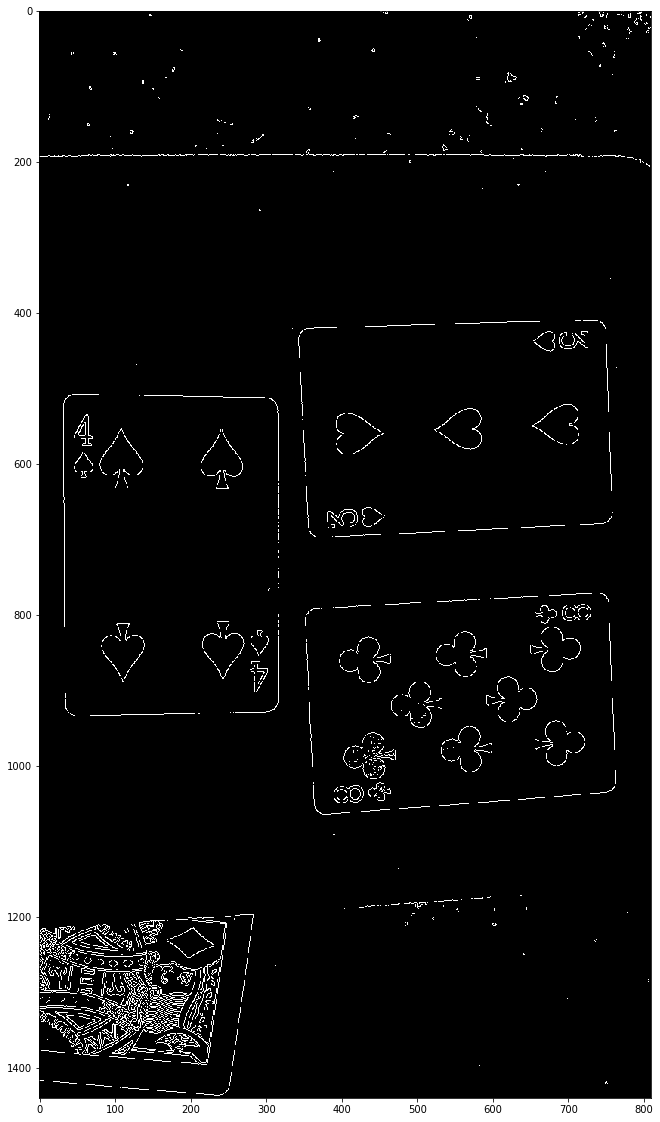

In [25]:
img = cv2.imread('card3.jpg', cv2.IMREAD_GRAYSCALE)
edge4 = cv2.Canny(img, 180, 200)
plt.figure(figsize=(30,20))
plt.imshow(edge4, cmap="gray")